In [55]:
import numpy as np
import pandas as pd

In [56]:
df = pd.read_csv('spam.csv')

In [57]:
df.sample(5)

,type,text
9,spam,Had your mobile 11 months or more? U R entitle...
52,ham,K fyi x has a ride early tomorrow morning but ...
97,ham,i see. When we finish we have loads of loans t...
25,ham,Just forced myself to eat a slice. I'm really ...
95,spam,Your free ringtone is waiting to be collected....


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    116 non-null    object
 1   text    116 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [59]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [60]:
df['type'] = encoder.fit_transform(df['type'])

In [61]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
df.isnull().sum()

type    0
text    0
dtype: int64

In [63]:
df.duplicated().sum()

1

In [64]:
df = df.drop_duplicates(keep='first')

In [65]:
df.duplicated().sum()

0

In [66]:
df.shape

(115, 2)

In [67]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
df['type'].value_counts()

0    97
1    18
Name: type, dtype: int64

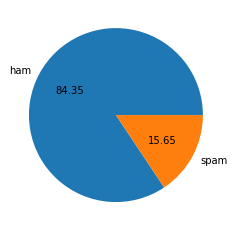

In [69]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [70]:
import nltk

In [71]:
!pip install nltk

In [72]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
df['num_characters'] = df['text'].apply(len)

In [74]:
df.head()

,type,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [75]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [76]:
df.head()

,type,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [77]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,type,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [78]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,115.000000,115.000000,115.000000
mean,85.713043,20.304348,2.200000
std,54.503946,12.161323,1.476126
min,14.000000,4.000000,1.000000
25%,41.000000,10.000000,1.000000
50%,73.000000,16.000000,2.000000
75%,135.000000,30.000000,3.000000
max,289.000000,69.000000,7.000000


In [79]:
# ham
df[df['type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,97.000000,97.000000,97.000000
mean,74.195876,18.247423,1.989691
std,50.937388,12.006969,1.318892
min,14.000000,4.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,56.000000,14.000000,2.000000
75%,107.000000,24.000000,2.000000
max,289.000000,69.000000,6.000000


In [80]:
#spam
df[df['type'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,18.000000,18.000000,18.000000
mean,147.777778,31.388889,3.333333
std,20.822939,4.840259,1.782266
min,78.000000,20.000000,1.000000
25%,147.500000,28.500000,2.000000
50%,155.000000,31.500000,3.000000
75%,158.000000,34.000000,4.750000
max,172.000000,39.000000,7.000000


In [81]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

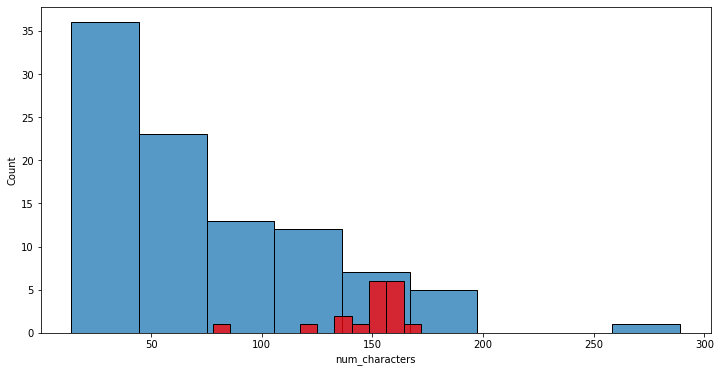

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type'] == 0]['num_characters'])
sns.histplot(df[df['type'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

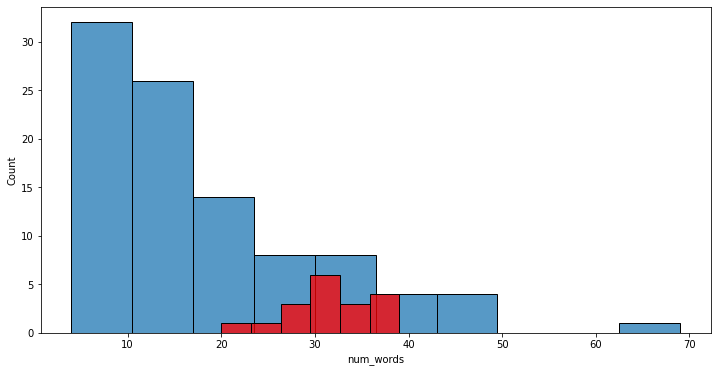

In [83]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type'] == 0]['num_words'])
sns.histplot(df[df['type'] == 1]['num_words'],color='red')

In [84]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
import pandas as pd
df = pd.read_csv('spam.csv')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # convert to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

import pandas as pd
import re
df = pd.read_csv('spam.csv')

df['transformed_text'] = df['text'].apply(clean_text)
df.head()



,type,text,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [86]:
df[df['type'] == 1]['transformed_text'].tolist()

[]

In [87]:
df.head()

,type,text,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [88]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])
df.head()

,type,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [89]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [90]:
spam_wc = wc.generate(df[df['type'] == 1]['transformed_text'].str.cat(sep=" "))

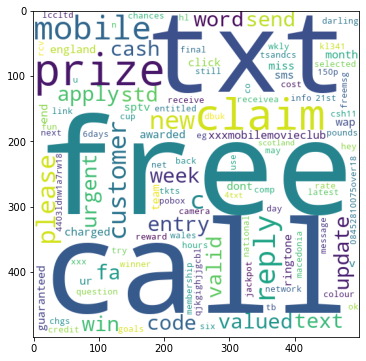

In [93]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [94]:
ham_wc = wc.generate(df[df['type'] == 0]['transformed_text'].str.cat(sep=" "))

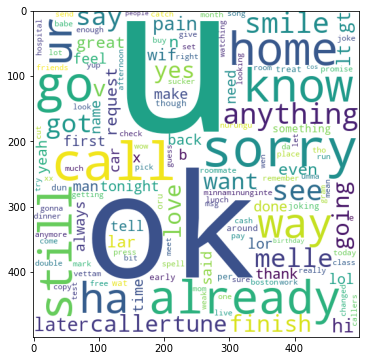

In [95]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [96]:
df.head()

,type,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [97]:
spam_corpus = []
for msg in df[df['type'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [98]:
len(spam_corpus)

334

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


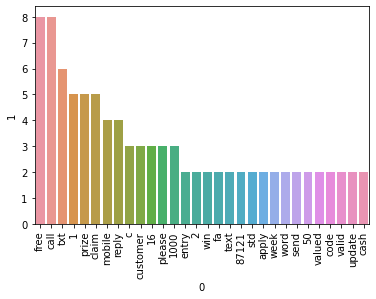

In [99]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [100]:
ham_corpus = []
for msg in df[df['type'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [101]:
len(ham_corpus)

801

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


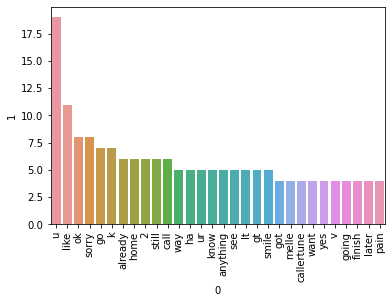

In [102]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [103]:
df.head()

,type,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [104]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [105]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [106]:
X.shape

(116, 707)

In [107]:
y = df['type'].values

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [110]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [111]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [112]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7916666666666666
[[16  4]
 [ 1  3]]
0.42857142857142855


In [113]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8333333333333334
[[20  0]
 [ 4  0]]
0.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8333333333333334
[[20  0]
 [ 4  0]]
0.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [121]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [122]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [123]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [124]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8333333333333334, 0.0)

In [125]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8333333333333334
Precision -  0.0
For  KN
Accuracy -  0.8333333333333334
Precision -  0.5
For  NB
Accuracy -  0.8333333333333334
Precision -  0.0
For  DT
Accuracy -  0.9166666666666666
Precision -  1.0
For  LR
Accuracy -  0.8333333333333334
Precision -  0.0
For  RF
Accuracy -  0.875
Precision -  1.0
For  AdaBoost
Accuracy -  0.9166666666666666
Precision -  1.0
For  BgC
Accuracy -  0.9166666666666666
Precision -  1.0
For  ETC
Accuracy -  0.8333333333333334
Precision -  0.0
For  GBDT
Accuracy -  0.9166666666666666
Precision -  1.0
[22:47:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.875
Precision -  0.6666666666666666


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [127]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [128]:
performance_df

,Algorithm,Accuracy,Precision
3,DT,0.916667,1.000000
5,RF,0.875000,1.000000
6,AdaBoost,0.916667,1.000000
7,BgC,0.916667,1.000000
9,GBDT,0.916667,1.000000
10,xgb,0.875000,0.666667
1,KN,0.833333,0.500000
0,SVC,0.833333,0.000000
2,NB,0.833333,0.000000
4,LR,0.833333,0.000000


In [129]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [130]:
performance_df1

,Algorithm,variable,value
0,DT,Accuracy,0.916667
1,RF,Accuracy,0.875000
2,AdaBoost,Accuracy,0.916667
3,BgC,Accuracy,0.916667
4,GBDT,Accuracy,0.916667
5,xgb,Accuracy,0.875000
6,KN,Accuracy,0.833333
7,SVC,Accuracy,0.833333
8,NB,Accuracy,0.833333
9,LR,Accuracy,0.833333


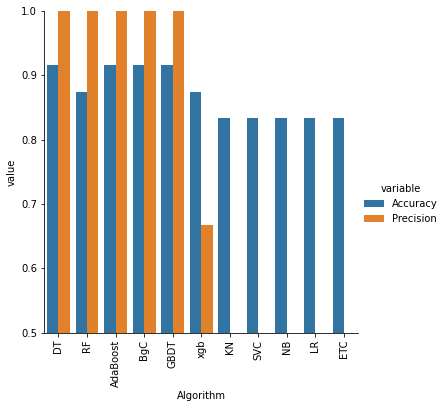

In [131]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [132]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [133]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [134]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [135]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [136]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [137]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,DT,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000
1,RF,0.875000,1.000000,0.875000,1.000000,0.875000,1.000000,0.875000,1.000000
2,AdaBoost,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000
3,BgC,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000
4,GBDT,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000
5,xgb,0.875000,0.666667,0.875000,0.666667,0.875000,0.666667,0.875000,0.666667
6,KN,0.833333,0.500000,0.833333,0.500000,0.833333,0.500000,0.833333,0.500000
7,SVC,0.833333,0.000000,0.833333,0.000000,0.833333,0.000000,0.833333,0.000000
8,NB,0.833333,0.000000,0.833333,0.000000,0.833333,0.000000,0.833333,0.000000
9,LR,0.833333,0.000000,0.833333,0.000000,0.833333,0.000000,0.833333,0.000000


In [138]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [139]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [140]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [141]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.875
Precision 1.0


In [142]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [143]:
from sklearn.ensemble import StackingClassifier

In [144]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [145]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9583333333333334
Precision 1.0


In [146]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))